# SETUP

In [1]:
import numpy as np
import pandas as pd
from matplotlib import rcParams

%matplotlib inline
rcParams['font.family'] = 'DejaVu Sans'

In [2]:
file = '/Users/quartz/GoogleDrive/ewp/data_whole_02.pkl'
data_raw = pd.read_pickle(file)
data_raw.tail()

,temperature_3H,precipitation_form,rainfall_probability,humidity,wind_speed,wind_direction,insolation
2018-03-06 19:00:00,1.000000,0.0,13.333333,81.666667,2.700000,117.0,0.0
2018-03-06 20:00:00,1.000000,0.0,16.666667,83.333333,2.900000,118.0,0.0
2018-03-06 21:00:00,1.000000,0.0,20.000000,85.000000,3.100000,119.0,0.0
2018-03-06 22:00:00,1.666667,0.0,20.000000,83.333333,3.133333,118.0,0.0
2018-03-06 23:00:00,2.333333,0.0,20.000000,81.666667,3.166667,117.0,0.0


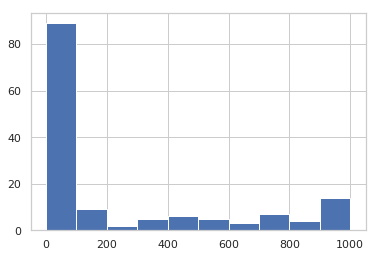

In [3]:
data_raw.insolation.hist()

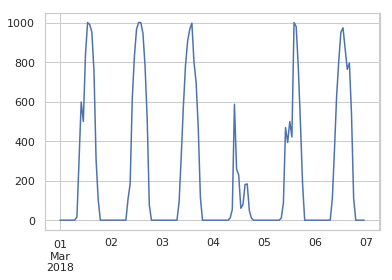

In [4]:
data_raw.insolation.plot()

In [5]:
data_raw.dtypes

temperature_3H          float64
precipitation_form      float64
rainfall_probability    float64
humidity                float64
wind_speed              float64
wind_direction          float64
insolation              float32
dtype: object

In [6]:
data_raw.describe()

,temperature_3H,precipitation_form,rainfall_probability,humidity,wind_speed,wind_direction,insolation
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,3.881944,0.125000,17.916667,76.631944,3.415278,162.791667,236.226974
std,5.008380,0.322372,22.476354,12.670697,1.403635,111.978963,348.745270
min,-3.000000,0.000000,0.000000,50.000000,1.000000,15.000000,0.000000
25%,-0.333333,0.000000,0.000000,68.333333,2.400000,59.750000,0.000000
50%,2.500000,0.000000,10.000000,79.166667,3.100000,133.833333,0.000000
75%,8.666667,0.000000,23.333333,86.666667,4.000000,282.083333,474.680580
max,15.000000,1.000000,80.000000,95.000000,7.300000,349.000000,1000.000000


In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2018-03-01 00:00:00 to 2018-03-06 23:00:00
Freq: H
Data columns (total 7 columns):
temperature_3H          144 non-null float64
precipitation_form      144 non-null float64
rainfall_probability    144 non-null float64
humidity                144 non-null float64
wind_speed              144 non-null float64
wind_direction          144 non-null float64
insolation              144 non-null float32
dtypes: float32(1), float64(6)
memory usage: 8.4 KB


In [8]:
data_raw.corr()

,temperature_3H,precipitation_form,rainfall_probability,humidity,wind_speed,wind_direction,insolation
temperature_3H,1.000000,0.402863,0.622741,0.470472,-0.092662,-0.374531,-0.195798
precipitation_form,0.402863,1.000000,0.899436,0.510868,0.171930,-0.418608,-0.158893
rainfall_probability,0.622741,0.899436,1.000000,0.698330,0.127115,-0.479782,-0.198891
humidity,0.470472,0.510868,0.698330,1.000000,-0.103271,-0.706706,-0.066582
wind_speed,-0.092662,0.171930,0.127115,-0.103271,1.000000,0.293615,-0.052002
wind_direction,-0.374531,-0.418608,-0.479782,-0.706706,0.293615,1.000000,0.093720
insolation,-0.195798,-0.158893,-0.198891,-0.066582,-0.052002,0.093720,1.000000


### 노트 (TODO)

- 전처리
- 모델링
- 논문에서 다른 파생변수를 사용하지는 않았을까?

- 실측 데이터
    - 일사량(자기회귀 파생변수, 평균 및 1~3사분위), 운량(하늘 상태로 예측), 자외선지수(평균 및 1~3사분위), 태양고도
    - 일사량 자기회귀 파생변수는 가능. 
    - 평균 및 1~3사분위 데이터는 어떻게 넣는지 잘 모르겠음.
    - 운량은 하늘상태 데이터 부재로 사용 어려움.
    - 태양고도는 샘플 데이터가 6일 데이터이기 때문에, 샘플 간 변별력이 없어 사용 X
    
> 일단 위 데이터로 모델링 시도

---

### 전처리

In [9]:
# X, y

y = data_raw.iloc[:, -1:]
X = data_raw.drop(['insolation'], axis=1)
X.shape, y.shape

((144, 6), (144, 1))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((108, 6), (36, 6), (108, 1), (36, 1))

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

y_train_sc = scaler.fit_transform(y_train)
y_test_sc = scaler.transform(y_test)

X_train_df = pd.DataFrame(data=X_train_sc, columns=X_train.columns)
X_test_df = pd.DataFrame(data=X_test_sc, columns=X_test.columns)

y_train_df = pd.DataFrame(data=y_train_sc, columns=y_train.columns)
y_test_df = pd.DataFrame(data=y_test_sc, columns=y_test.columns)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype float32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


---

### 모델링

In [12]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear = model_linear.fit(X_train_df, y_train_df)
y_pred = model_linear.predict(X_test_df)

np.mean(np.power(y_pred - y_test_df.values, 2))

0.12607510041536515

In [13]:
import statsmodels.api as sm

model = sm.OLS(y_train_df, X_train_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             insolation   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     10.10
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           9.54e-09
Time:                        12:11:28   Log-Likelihood:                -33.790
No. Observations:                 108   AIC:                             79.58
Df Residuals:                     102   BIC:                             95.67
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
temperature_3H          -0.0130 

In [14]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor()
model_rfr = model_rfr.fit(X_train_df, y_train_df)
y_pred = model_rfr.predict(X_test_df)
np.mean(np.power(y_pred - y_test_df.values, 2))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.16678887030282918

In [16]:
y_pred - y_test_df.values

array([[ 0.00181408,  0.24645221,  0.10929013, ...,  0.02296428,
         0.10141435,  0.53661527],
       [ 0.00181408,  0.24645221,  0.10929013, ...,  0.02296428,
         0.10141435,  0.53661527],
       [ 0.00181408,  0.24645221,  0.10929013, ...,  0.02296428,
         0.10141435,  0.53661527],
       ...,
       [ 0.00181408,  0.24645221,  0.10929013, ...,  0.02296428,
         0.10141435,  0.53661527],
       [-0.61567096, -0.37103284, -0.50819492, ..., -0.59452077,
        -0.5160707 , -0.08086978],
       [-0.99818592, -0.75354779, -0.89070987, ..., -0.97703572,
        -0.89858565, -0.46338473]])

### 노트

- linear regression, random forest regressor의 성능이 높지 않게 나온다. (Adj. R-squared 0.331 / rmse : 0.117 / 0.161 정도)